In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Parth\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replaacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df["customerID"].duplicated().sum()

0

# convert 0 and 1 of senior citizen to yes / no  to make it easier to understand

In [10]:
def conv (value):
    if value == 1:
        return "yes"
    else :
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
    

<Axes: xlabel='count', ylabel='SeniorCitizen'>

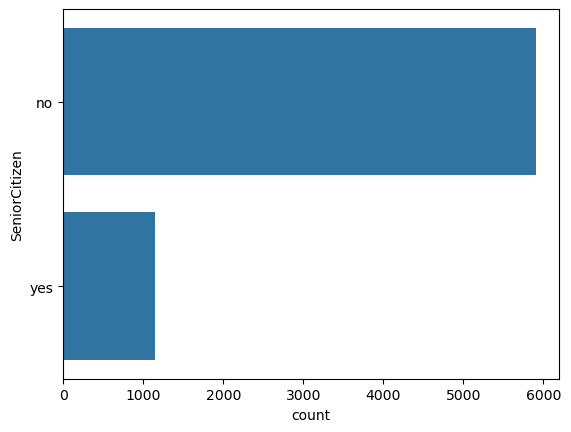

In [11]:
sns.countplot(df["SeniorCitizen"])

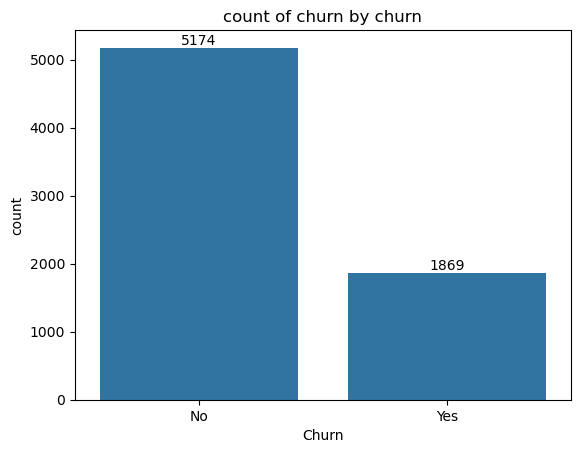

In [12]:
ax = sns.countplot( x = "Churn" , data = df)
ax.bar_label(ax.containers[0])
plt.title("count of churn by churn")
plt.show()

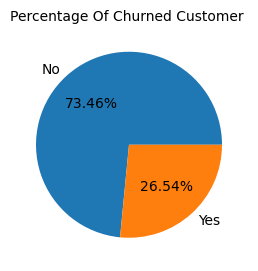

In [13]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({"Churn" : "count"})
gb
plt.pie(gb["Churn"], labels = gb.index  , autopct = "%1.2f%%" )
plt.title("Percentage Of Churned Customer " , fontsize = 10)
plt.show()

In [14]:
#  from the give pie chart we can conclude that our 26.54% are churned out 


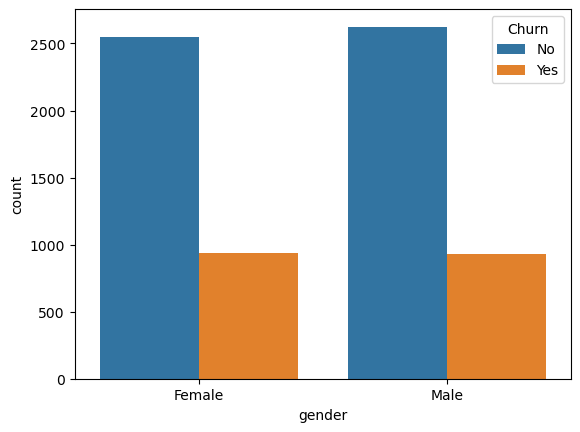

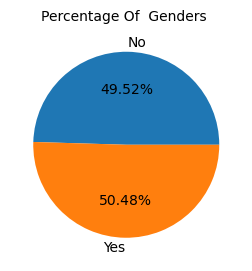

In [16]:
sns.countplot(x =df["gender"] , data = df , hue = "Churn" )
plt.figure(figsize = (3,4))
gen = df.groupby("gender").agg({"gender" : "count"})
plt.pie(gen["gender"], labels = gb.index  , autopct = "%1.2f%%" )
plt.title("Percentage Of  Genders " , fontsize = 10)
plt.show()

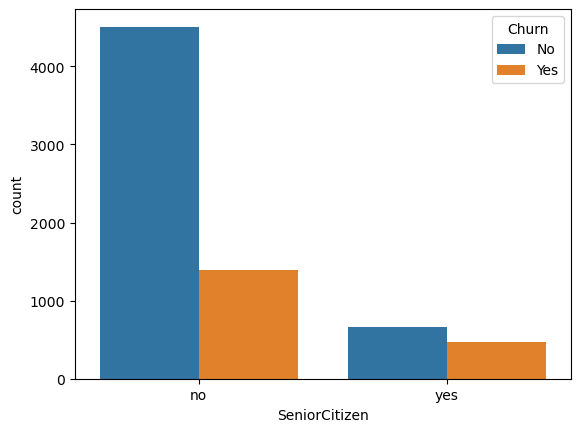

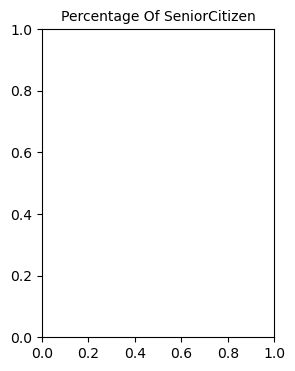

In [17]:
sns.countplot(x =df["SeniorCitizen"] , data = df , hue = "Churn" )
plt.figure(figsize = (3,4))
plt.title("Percentage Of SeniorCitizen" , fontsize = 10)
plt.show()

C:\Users\Parth\AppData\Local\Temp\ipykernel_6016\3580964251.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cross_tab.loc[x].cumsum()[i] - cross_tab.loc[x][i]/2,  # Position label in the center of each section


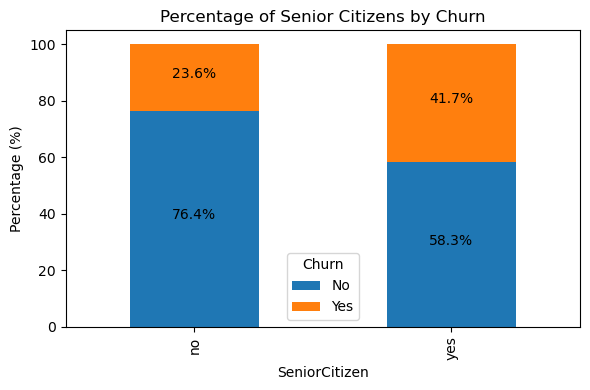

In [24]:
# Create a crosstab for SeniorCitizen vs Churn to get the counts
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100  # Normalize by row to get percentage

# Plotting the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(6,4))

# Add percentage labels on the bars
for n, x in enumerate([*cross_tab.index]):
    for (i, percentage) in enumerate(cross_tab.loc[x]):
        plt.text(n, 
                 cross_tab.loc[x].cumsum()[i] - cross_tab.loc[x][i]/2,  # Position label in the center of each section
                 f'{percentage:.1f}%', 
                 ha='center', 
                 color='black', 
                 fontsize=10)

# Adding labels and title
plt.title("Percentage of Senior Citizens by Churn", fontsize=12)
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.legend(title="Churn")
plt.tight_layout()

plt.show()

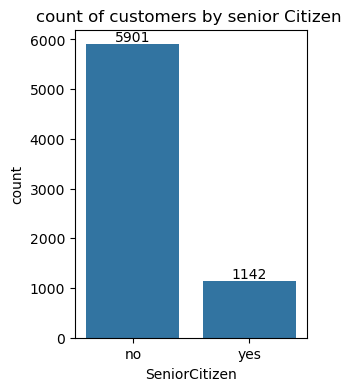

In [29]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x = "SeniorCitizen" , data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by senior Citizen ")
plt.show()

In [30]:
#  comparatively a greater percentage of people in senior ctizen 

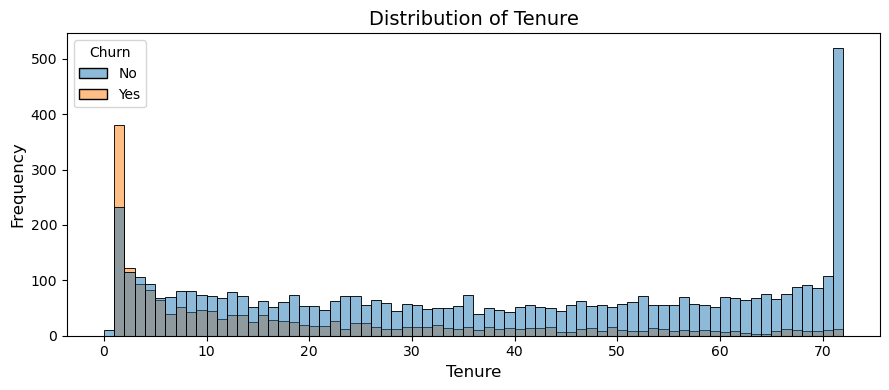

In [41]:
# Fixing the typo in the column name 'tenure'
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue  = "Churn")

# Add labels and title
plt.xlabel("Tenure", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Tenure", fontsize=14)

plt.tight_layout()  # Ensure everything fits without overlap
plt.show()



#  hue helps in giving the filter in chart  

In [43]:
# People who have used our services for a long time have stayed and people who have used for one or 2 months have churned 

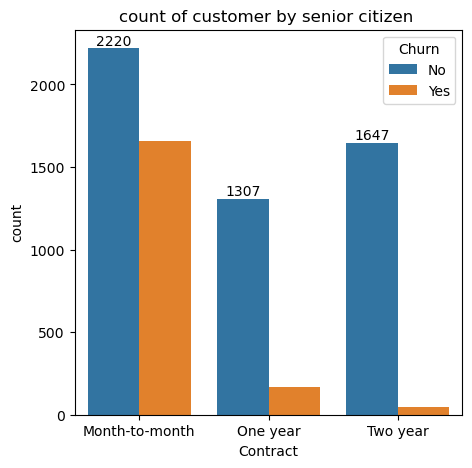

In [50]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract" , data = df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customer by senior citizen ")
plt.show()

In [ ]:
#  people who have months to months of contract are likely to churn then from those who have 1 or 2 year or contract  

In [54]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

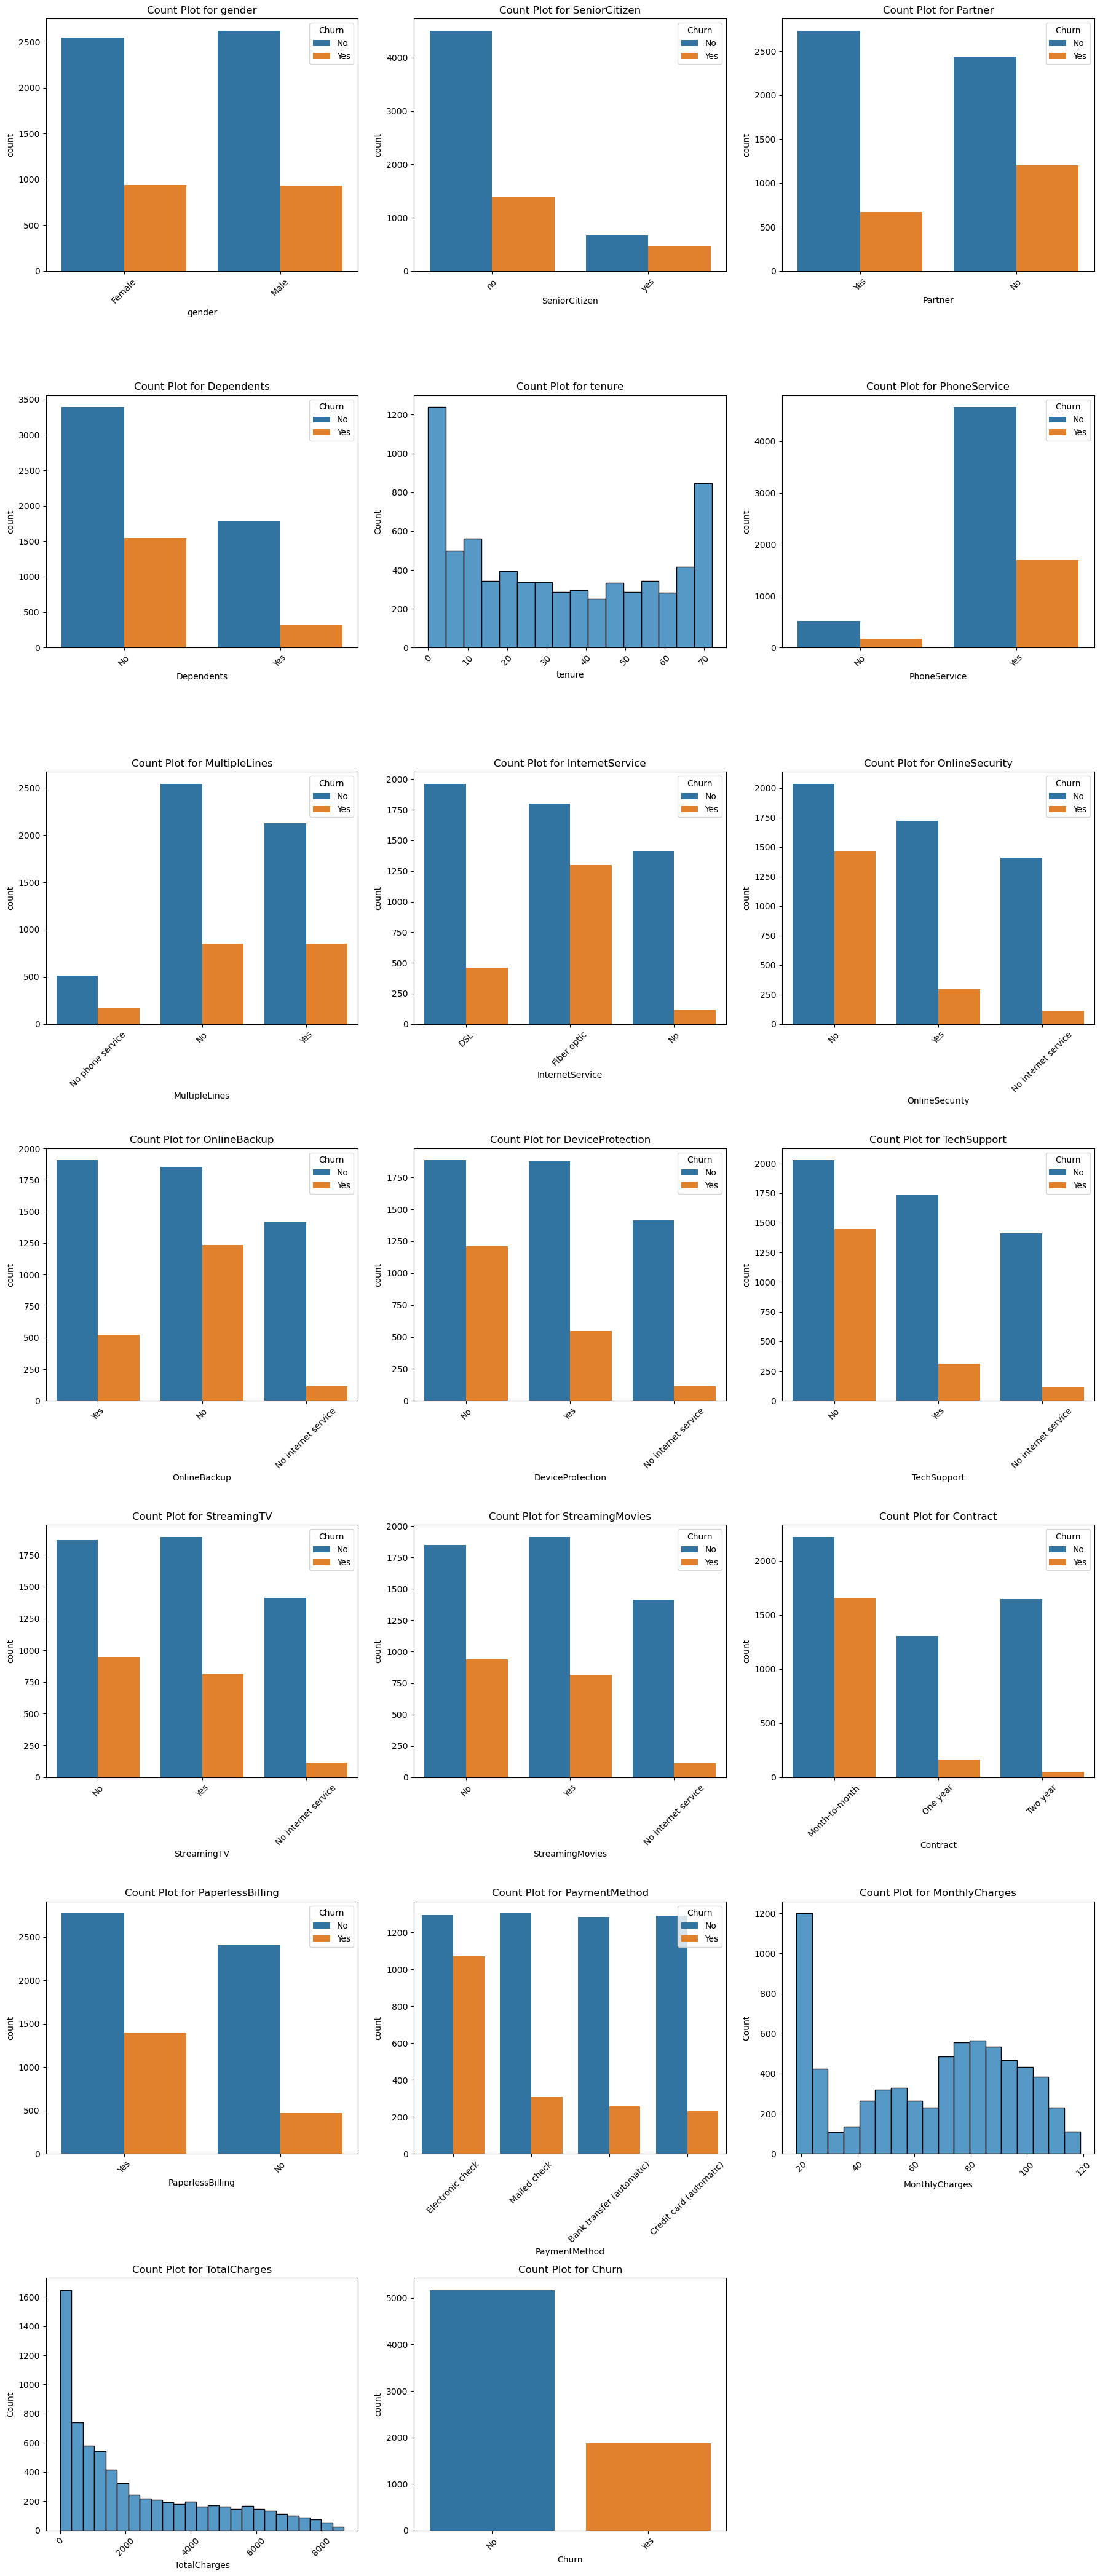

In [59]:
# Assuming you have a DataFrame `df` with the columns you provided
# df = pd.read_csv("your_dataset.csv")

# List of columns (if it's a subset or ordered differently)
columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
           'TotalCharges', 'Churn']

# Number of plots (ignoring customerID, which is unique and not suitable for a count plot)
n_cols = len(columns) - 1  # Excluding 'customerID'
n_rows = (n_cols // 3) + 1  # Creating a 3-column layout for subplots

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Plot each column
for i, col in enumerate(columns[1:]):  # Skip 'customerID' for plotting
    if df[col].dtype == 'object' or df[col].nunique() < 20:  # Categorical or few unique values
        sns.countplot(data=df, x=col, ax=axes[i] , hue = df["Churn"])
    else:
        sns.histplot(data=df, x=col, ax=axes[i], kde=False)  # Continuous columns

    axes[i].set_title(f'Count Plot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability



# Remove extra subplots (if there are more axes than columns)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])



plt.tight_layout()
plt.show()

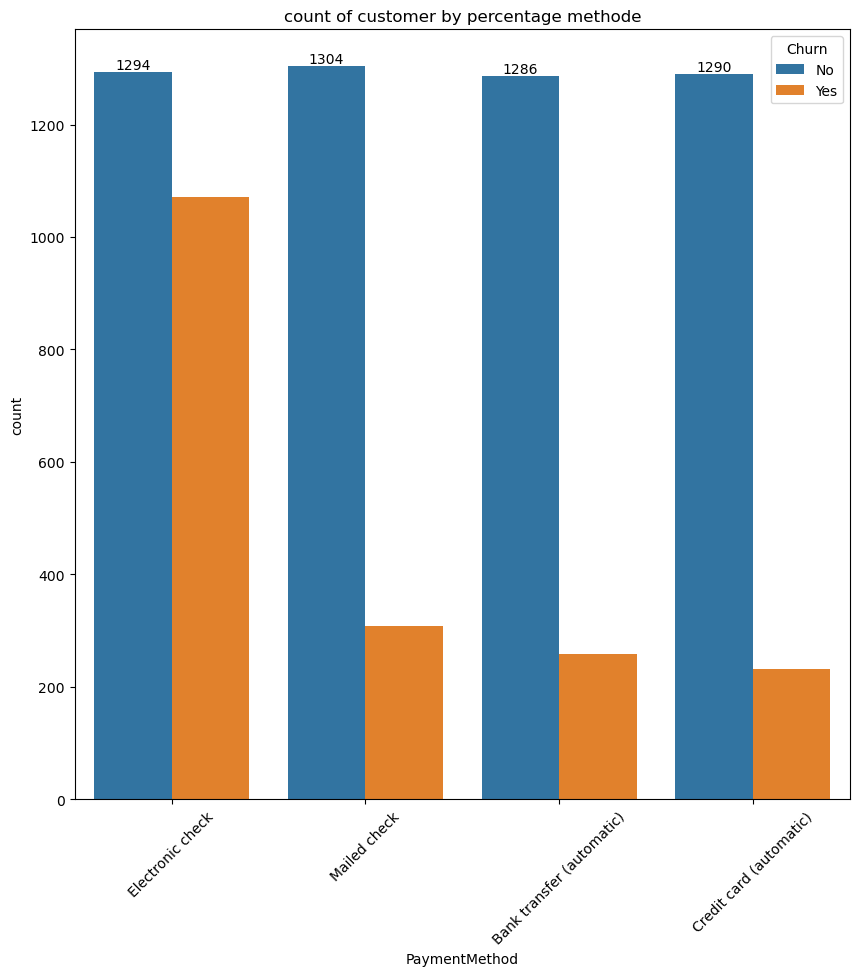

In [73]:
plt.figure(figsize = (10,10))
ax =  sns.countplot(x = "PaymentMethod", data = df , hue = "Churn" )
ax.bar_label(ax.containers[0])
plt.title("count of customer by percentage methode")
plt.xticks(rotation = 45)
plt.show()


In [ ]:
#  customer is likely to churn when he is using electronic cheak as a payment method 